In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

1. Read data and shuffle the rows in the raw data matrix:

2. Replace the responses 2 and 4 with 0 and 1 and divide the dataset into a training set and
a test set. How many observations did you allocated for testing, and why this number?

In [ ]:
data = pd.read_csv('/content/breast_cancer.csv', header=None)
data1 = data.sample(frac=1).reset_index(drop=True)
X = data1.iloc[:,0:9]
y = data1.iloc[:,9]

y = y.replace(2, 0)
y = y.replace(4, 1)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)
print("Number of observations for training data : ",len(X_train))
print("Number of observations for test data : ",len(X_test))

Number of observations for training data :  614
Number of observations for test data :  69


3. Normalize the training data and train a linear logistic regression model using gradient
descent. Print the hyperparameters  and Niter and plot the cost function J() as a
function over iterations.

In [ ]:
scaler = StandardScaler()
X_train_normalized = pd.DataFrame(scaler.fit_transform(X_train))
X_train_normalized_extended = pd.concat([pd.Series(1, index=X_train_normalized.index, name='00'), X_train_normalized], axis=1)

X_test_normalized = pd.DataFrame(scaler.transform(X_test))
X_test_normalized_extended = pd.concat([pd.Series(1, index=X_test_normalized.index, name='00'), X_test_normalized], axis=1)

In [ ]:
def sigmoid(z):
  
    return 1/ (1 + np.exp(-z))

def costFunction(theta, X, y):

    m=len(y)    
    predictions = sigmoid(np.dot(X,theta))
    predictions = np.concatenate(predictions)
    error = (-y * np.log(predictions)) - ((1-y)*np.log(1-predictions))
    cost = 1/m * sum(error)    
    grad = 1/m * np.dot(X.transpose(),(predictions - y))
    
    return cost , grad

def gradientDescent(X,y,theta,alpha,num_iters):

    m=len(y)
    J_history =[]
    
    for i in range(num_iters):

        cost, grad = costFunction(theta,X,y)
        theta1 = np.concatenate(theta) - (alpha * grad).T
        theta = np.array(theta1).reshape((n,1))
        J_history.append(cost)
    
    return theta , J_history

def classifierPredict(theta,X,y):
    predictions = X.dot(theta)       
    pred = predictions>0
    pred = pred.astype(int)
    count_ = sum(np.concatenate(np.array(pred)) == np.array(y))
    accuracy = (count_ / len(X)) * 100
    error_count = len(X) - count_
    return accuracy, error_count

Hyperparameters :
-Alpha(learning rate) : 0.001
-Niter(number of iterations) : 10000
Theta :  [-0.45048171  0.56442365  0.56004388  0.58235531  0.50035033  0.46705731
  0.68486017  0.55318671  0.50650671  0.30236871]


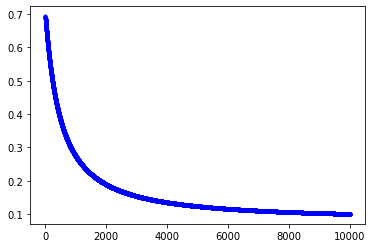

In [ ]:
m , n = X_train_normalized_extended.shape[0], X_train_normalized_extended.shape[1]
initial_theta = np.zeros((n,1))
epochs = 10000
lr = 0.001
theta, cost_hist= gradientDescent(X_train_normalized_extended,y_train,initial_theta,lr,epochs)
print("Hyperparameters :\n-Alpha(learning rate) : {}\n-Niter(number of iterations) : {}".format(lr,epochs))
print("Theta : ",np.concatenate(theta))
plt.figure()
plt.plot(range(0, len(cost_hist)), cost_hist,'b.')
plt.show()

4. What is the training error (number of non-correct classifications in the training data) and
the training accuracy (percentage of correct classifications) for your model?

5. What is the number of test error and the test accuracy for your model?

In [ ]:
tr_acc, tr_err =classifierPredict(theta, X_train_normalized_extended, y_train)
print("Train Accuracy : ", tr_acc)
print("Train error : ", tr_err)

print("-------------------")

te_acc, te_err =classifierPredict(theta, X_test_normalized_extended, y_test)
print("Test Accuracy : ", te_acc)
print("Test error : ", te_err)

Train Accuracy :  97.06840390879479
Train error :  18
-------------------
Test Accuracy :  98.55072463768117
Test error :  1


6. Repeated runs will (due to the shuffling) give different results. Are they qualitatively
the same? Do they depend on how many observations you put aside for testing? Is the
difference between training and testing expected?

In [ ]:
train_errors = []
test_errors = []

train_acc = []
test_acc = []
for k in range(10):
    data1 = data.sample(frac=1).reset_index(drop=True)
    X = data1.iloc[:,0:9]
    y = data1.iloc[:,9]

    y = y.replace(2, 0)
    y = y.replace(4, 1)

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)
    #print("Number of observations for training data : ",len(X_train))
    #print("Number of observations for test data : ",len(X_test))

    scaler = StandardScaler()
    X_train_normalized = pd.DataFrame(scaler.fit_transform(X_train))
    X_train_normalized_extended = pd.concat([pd.Series(1, index=X_train_normalized.index, name='00'), X_train_normalized], axis=1)

    X_test_normalized = pd.DataFrame(scaler.transform(X_test))
    X_test_normalized_extended = pd.concat([pd.Series(1, index=X_test_normalized.index, name='00'), X_test_normalized], axis=1)

    m , n = X_train_normalized_extended.shape[0], X_train_normalized_extended.shape[1]
    initial_theta = np.zeros((n,1))
    epochs = 10000
    lr = 0.001
    theta, cost_hist= gradientDescent(X_train_normalized_extended,y_train,initial_theta,lr,epochs)


    tr_acc, tr_err =classifierPredict(theta, X_train_normalized_extended, y_train)
    train_acc.append(tr_acc)
    train_errors.append(tr_err)
    # print("Train Accuracy : ", tr_acc)
    # print("Train error : ", tr_err)

    # print()

    te_acc, te_err =classifierPredict(theta, X_test_normalized_extended, y_test)
    # print("Test Accuracy : ", te_acc)
    # print("Test error : ", te_err)
    test_acc.append(te_acc)
    test_errors.append(te_err)

    print("*****************")


*****************
*****************
*****************
*****************
*****************
*****************
*****************
*****************
*****************
*****************


In [ ]:
print("Mean train accuracy : ", np.mean(train_acc))
print("Mean test accuracy : ", np.mean(test_acc))
print("Standard Deviation in train accuracy : ", np.std(train_acc))
print("Standard Deviation in test accuracy : ", np.std(test_acc))

print()
print("Mean train errors : ", np.mean(train_errors))
print("Mean test errors : ", np.mean(test_errors))
print("Standard Deviation in train errors : ", np.std(train_errors))
print("Standard Deviation in test errors : ", np.std(test_errors))


Mean train accuracy :  97.19869706840392
Mean test accuracy :  97.10144927536233
Standard Deviation in train accuracy :  0.17541253443434826
Standard Deviation in test accuracy :  1.714805734231774

Mean train errors :  17.2
Mean test errors :  2.0
Standard Deviation in train errors :  1.0770329614269007
Standard Deviation in test errors :  1.1832159566199232


Due to shuffling, there might occurs different samples in train and test sets each time we run. Thus we have simulated the training and testing metrics for 10 iterations and the mean values are as reported above. The values are not exactly same for every iteration, but looking at the standard deviation, we could report a reasonable train and test accuracies for every iteration.

In [ ]:
train_errors = []
test_errors = []

train_acc = []
test_acc = []
for k in list([0.1,0.2,0.25,0.3,0.4,0.45,0.5,0.55,0.6,0.7]):
    data1 = data.sample(frac=1).reset_index(drop=True)
    X = data1.iloc[:,0:9]
    y = data1.iloc[:,9]

    y = y.replace(2, 0)
    y = y.replace(4, 1)

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=k)
    print("Number of observations for training data : ",len(X_train))
    print("Number of observations for test data : ",len(X_test))

    scaler = StandardScaler()
    X_train_normalized = pd.DataFrame(scaler.fit_transform(X_train))
    X_train_normalized_extended = pd.concat([pd.Series(1, index=X_train_normalized.index, name='00'), X_train_normalized], axis=1)

    X_test_normalized = pd.DataFrame(scaler.transform(X_test))
    X_test_normalized_extended = pd.concat([pd.Series(1, index=X_test_normalized.index, name='00'), X_test_normalized], axis=1)

    m , n = X_train_normalized_extended.shape[0], X_train_normalized_extended.shape[1]
    initial_theta = np.zeros((n,1))
    epochs = 10000
    lr = 0.001
    theta, cost_hist= gradientDescent(X_train_normalized_extended,y_train,initial_theta,lr,epochs)


    tr_acc, tr_err =classifierPredict(theta, X_train_normalized_extended, y_train)
    train_acc.append(tr_acc)
    train_errors.append(tr_err)
    print("Train Accuracy : ", tr_acc)
    print("Train error : ", tr_err)

    print()

    te_acc, te_err =classifierPredict(theta, X_test_normalized_extended, y_test)
    print("Test Accuracy : ", te_acc)
    print("Test error : ", te_err)
    test_acc.append(te_acc)
    test_errors.append(te_err)

    print("*****************")


Number of observations for training data :  614
Number of observations for test data :  69
Train Accuracy :  97.06840390879479
Train error :  18

Test Accuracy :  98.55072463768117
Test error :  1
*****************
Number of observations for training data :  546
Number of observations for test data :  137
Train Accuracy :  96.88644688644689
Train error :  17

Test Accuracy :  98.54014598540147
Test error :  2
*****************
Number of observations for training data :  512
Number of observations for test data :  171
Train Accuracy :  97.265625
Train error :  14

Test Accuracy :  97.07602339181285
Test error :  5
*****************
Number of observations for training data :  478
Number of observations for test data :  205
Train Accuracy :  97.48953974895397
Train error :  12

Test Accuracy :  96.58536585365853
Test error :  7
*****************
Number of observations for training data :  409
Number of observations for test data :  274
Train Accuracy :  97.79951100244499
Train error :  9


In [ ]:
print("Mean train accuracy : ", np.mean(train_acc))
print("Mean test accuracy : ", np.mean(test_acc))
print("Standard Deviation in train accuracy : ", np.std(train_acc))
print("Standard Deviation in test accuracy : ", np.std(test_acc))

print()
print("Mean train errors : ", np.mean(train_errors))
print("Mean test errors : ", np.mean(test_errors))
print("Standard Deviation in train errors : ", np.std(train_errors))
print("Standard Deviation in test errors : ", np.std(test_errors))


Mean train accuracy :  97.41666742495886
Mean test accuracy :  96.39460636519082
Standard Deviation in train accuracy :  0.45069120217806946
Standard Deviation in test accuracy :  1.027546579082154

Mean train errors :  12.142857142857142
Mean test errors :  7.428571428571429
Standard Deviation in train errors :  3.0904725218262765
Standard Deviation in test errors :  3.619674131234265


No, the accuracy does not depend on how many observations you put aside for testing. This has been analysed by running the code for various values of the proportion for test set. 

The difference between training and testing results are not as expected. Usually we expect the test accuracy to be a bit lower than the training accuracy. But in case, they are very close and the reason for this might be the inbalanced dataset where, there are more samples with label 0 are greater than that of label 1.
